# Séries temporais

Olá!<br><br>

O presente notebook é foda numa análise de uma pequena série temporal de vendas de shampoo ao longo de um período de 35 meses. <br>
Começaremos trabalhando com dois modelos, autoregressivo e média móvel, veremos como se comportam os diagnósticos e faremos uma predição. <br><br>
Na sequência utilizaremos o fbprophet para modelar os dados e vermos sua predição. 
<br><br>
O foco é conseguir encontrar os melhores parâmetros para obter um previsão fiel para 1 ano a frente.
<br>
Mãos a obra!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet
import datetime

Importing plotly failed. Interactive plots will not work.


In [2]:
#Conferindo nossos dados:

df = pd.read_csv('shampoo.csv')
df.Month = df.Month.astype(str)
df.Month

0     1-01
1     1-02
2     1-03
3     1-04
4     1-05
5     1-06
6     1-07
7     1-08
8     1-09
9     1-10
10    1-11
11    1-12
12    2-01
13    2-02
14    2-03
15    2-04
16    2-05
17    2-06
18    2-07
19    2-08
20    2-09
21    2-10
22    2-11
23    2-12
24    3-01
25    3-02
26    3-03
27    3-04
28    3-05
29    3-06
30    3-07
31    3-08
32    3-09
33    3-10
34    3-11
35    3-12
Name: Month, dtype: object

In [3]:
df.Sales.dtype

dtype('float64')

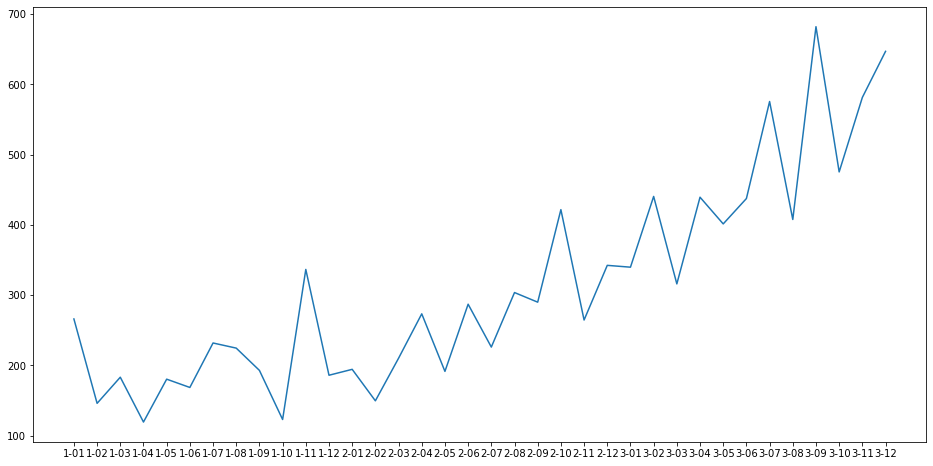

In [4]:
fig = plt.figure(figsize=[16,8])
fig = plt.plot(df.Month, df.Sales)

### Aparentemente a distribuição das vendas tem uma distribuição crescente com padrão linear

In [5]:
#Importando nossos primeiros modelos:

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [6]:
#Transformando o df em array

data_clean = df.Sales
#data_clean.shape

In [7]:
#Definindo um modelo ARMA: 

def ARMA_sales(data,p,q):
    model = ARIMA(data, order = [p,0,q])
    model_fit = model.fit()
    return model_fit

In [8]:
arma_1_1 = ARMA_sales(data_clean,1,1)
#arma_2_2 = ARMA_sales(data_clean,2,2) Overfitting

In [9]:
#Conferindo o diagnóstico dos dados tanto para o autoregressivo quanto para a média móvel:

arma_1_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -211.054
Date:                Mon, 22 Nov 2021   AIC                            430.108
Time:                        17:30:26   BIC                            436.442
Sample:                             0   HQIC                           432.319
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        372.7010    234.967      1.586      0.113     -87.826     833.228
ar.L1          0.9802      0.044     22.343      0.000       0.894       1.066
ma.L1         -0.5855      0.217     -2.695      0.007      -1.011      -0.160
sigma2      6857.3421   1720.647      3.985      0.000    3484.935    1.02e+04
===================================================================================
Ljung-Box (L1) (Q):                   3.66   Jarque-Bera (JB):                 2.41
Prob(Q):                              0.06   Prob(JB):                         0.30
Heteroskedasticity (H):               2.11   Skew:                             0.63
Prob(H) (two-sided):                  0.21   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Podemos perceber uma pequena variação no p valor no modelo de média móvel, vamos ver os diagnósticos para um modelo arma.

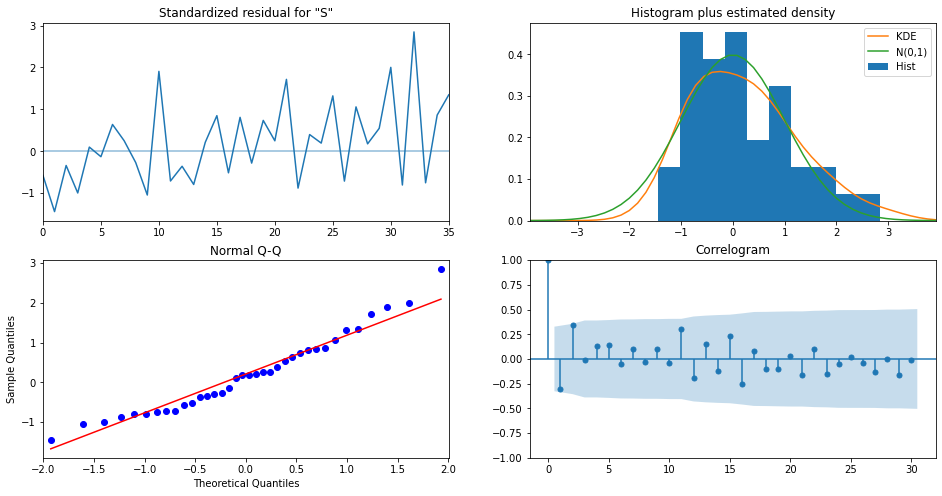

In [10]:
fig1 = plt.figure(figsize=[16,8])
fig1 = arma_1_1.plot_diagnostics(fig=fig1,lags=30) #prestar atenção no lags para bater com o número total de observações

O modelo parece ter um ajuste decente, muito por conta da pouca quantidade de dados disponíveis, mas ainda pode ser melhor, vamos testar com o auto regressivo:

In [11]:
#Testando apenas o Auto regressivo:

def AR_model_generation(ts, p):
    model = ARIMA(ts, order = [p,0,0])
    model_fit = model.fit()
    return model_fit

In [12]:
#Testando apenas o modelo com 1 ordem por saber que duas já entra em overfitting:

AR_1 = AR_model_generation(data_clean, 1)

In [13]:
AR_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -218.079
Date:                Mon, 22 Nov 2021   AIC                            442.157
Time:                        17:30:27   BIC                            446.908
Sample:                             0   HQIC                           443.815
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        333.2374     78.267      4.258      0.000     179.838     486.637
ar.L1          0.7509      0.128      5.872      0.000       0.500       1.002
sigma2      1.045e+04   2789.298      3.747      0.000    4985.064    1.59e+04
===================================================================================
Ljung-Box (L1) (Q):                   7.54   Jarque-Bera (JB):                 2.51
Prob(Q):                              0.01   Prob(JB):                         0.28
Heteroskedasticity (H):               2.16   Skew:                             0.65
Prob(H) (two-sided):                  0.20   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

P valores em 0, devemos ter um melhor ajuste:

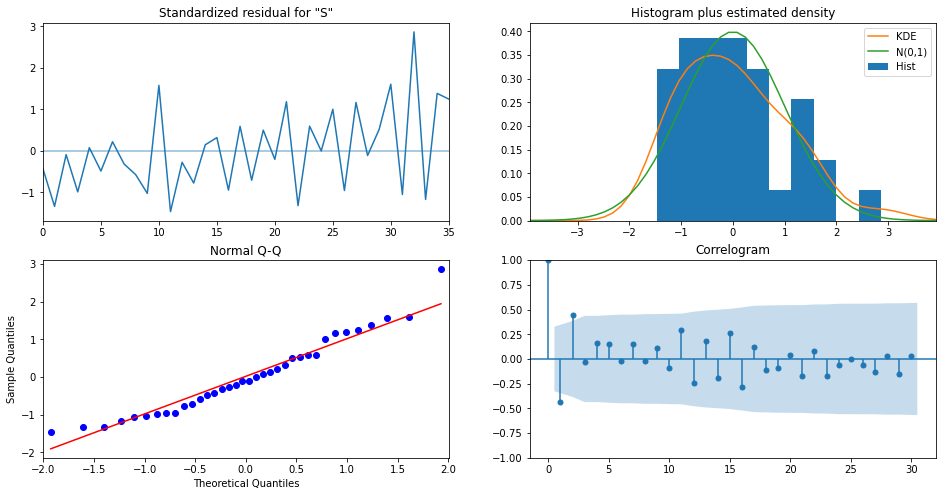

In [14]:
# diagnósticos AR

fig2 = plt.figure(figsize=[16,8])
fig2 = AR_1.plot_diagnostics(fig=fig2,lags=30) 

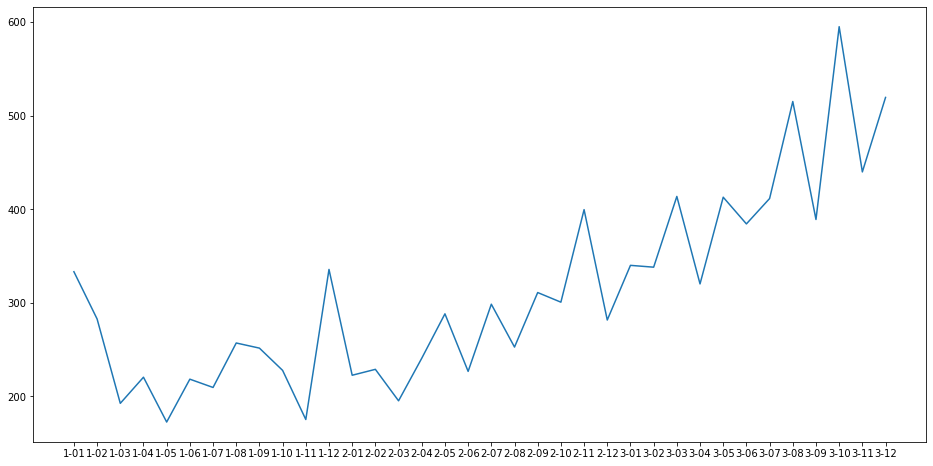

In [15]:
#Essa predição está ajustada como se previsse os anos consecutivos inteiros, atentar para esse fato.

fig3 = plt.figure(figsize=[16,8])
fig3 = plt.plot(df.Month,AR_1.predict())

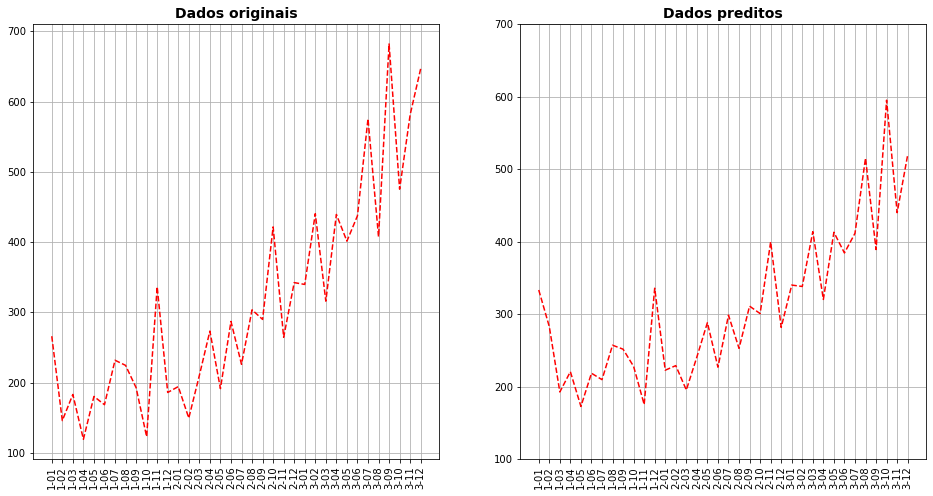

In [16]:
#Comparando os dados originais com a previsão do AR1:

#Essa é uma previsão direta, faremos também a previsão do prophet a chance desta errar é muito grande:

plt.figure(figsize=[16,8])
plt.subplot(1,2,1)
plt.plot(df.Month,df.Sales, c="red", linestyle="dashed")
plt.title("Dados originais", fontsize = '14', fontweight ='bold')
plt.xticks(rotation = '90')
plt.yticks(np.arange(100,800,100))
plt.grid()
plt.subplot(1,2,2)
plt.plot(df.Month,AR_1.predict(), c='red', linestyle = "dashed")
plt.title("Dados preditos", fontsize = '14', fontweight ='bold')
plt.xticks(rotation = '90')
plt.yticks(np.arange(100,800,100))
plt.grid()
plt.show()

E preciso tomar cuidado com esta predição: <br>
Na comparação da predição do modelo AR com os dados originais, podemos ver que ele fez uma predição que não contempla valores tão grandes, mas também não contempla valores tão baixos. Como há um padrão próximo ao linear nos dados originais, o modelo condensou as estimativas próximas a reta imaginária que acompanha a tendência dos dados, ou seja, fez exatamente o que deveria fazer, mas em termos de análise, se pensarmos que as vendas cresceram ao longo de 3 anos, a predição para datas depois de 3-12 não deveria partir dos patamares da tendência iniciada em 1-01. <br>
O prophet tem mais ferramentas para lidar com esse tipo de questão.


## Utilizando o prophet

In [17]:
#Renomeando as colunas do dataframe para o prophet:

df = df.rename(columns={'Month':'ds', 'Sales':'y'})
df.head()


,ds,y
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [18]:
#Como o formato das datas pode causas alguns bugs no prophet, irei adicionar alguns caracters correspondentes aos anos
#para facilitar o modelo.

#Adiciona o necessário para o ano:

df['ds'] = ['200'+i for i in df.ds]
df['ds'] = pd.to_datetime(df.ds, format= "%Y/%m/%d")
df.head()

,ds,y
0,2001-01-01,266.0
1,2001-02-01,145.9
2,2001-03-01,183.1
3,2001-04-01,119.3
4,2001-05-01,180.3


In [19]:
#Iniciando com um modelo básico adicionando apenas a sasonalidade necessária:

model = Prophet(
    seasonality_mode = "multiplicative",
    weekly_seasonality= False,
    daily_seasonality = False,
    yearly_seasonality = False,
)
model.add_seasonality(name='monthly', period=30.5, fourier_order=20) #Adicionando a sasonalidade mensal que corresponde aos dados:

model.fit(df)



INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


No caso do prophet a sasonalidade é um parâmetro muito significativo para o modelo, já que tempo sempre pode ser decomposto até a menor das frações podemos olhar para um mesmo fenômeno através de vários espectros de tempo.<br>
Nossos dados datam do início do mês e seguem, mês a mês, num total de 3 anos. Isso abre um pequeno espaço para utilizar a sasonalidade anual do prophet, ou até mesmo a diária.<br>
Escolhi adicionar uma sazonalidade mensal que acompanha os dados originais, com uma ordem fourier alta para tentar ajustar ao máximo a tendência as pequenas mudanças dos dados, vamos acompanhar os resultados:

C:\Users\Caio\anaconda3\lib\site-packages\fbprophet\plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


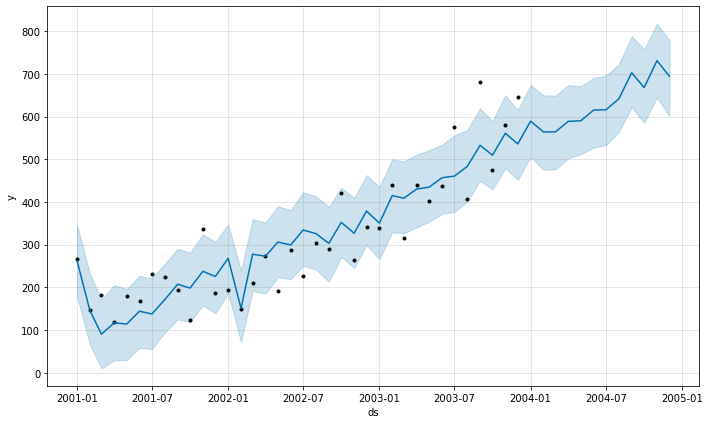

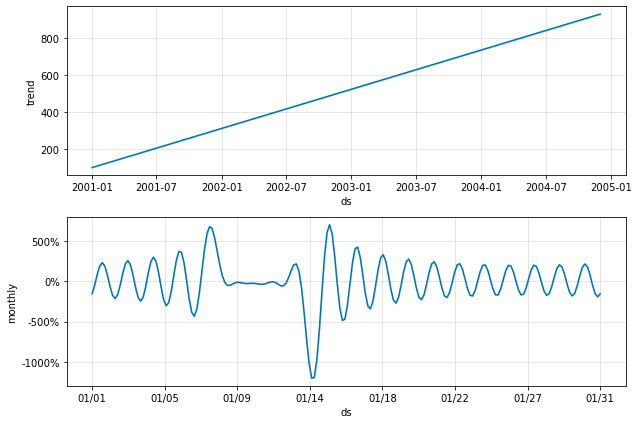

In [20]:
#Gerando o dataframe de dados futuros e fazendo a predição:

future = model.make_future_dataframe(periods=12,freq= "MS") #MS = MonthStart, parte do início de cada mês:

forecast = model.predict(future)
fig4 = model.plot(forecast)
fig5 = model.plot_components(forecast)

Este primeiro modelo do prophet obedeceu parte da tendência do modelo anterior levando em conta a possibilidade de um crescimento linear quando olhamos para 12 meses a frente. Vamos tentar trabalhar um modelo menos generalista como foi feito acima, ajustando melhor os parâmetros para o caso específico, para isso vamos trabalhar com um gridsearch.

In [21]:
#Está celula de código está disponível na documentação do prophet:

import itertools
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics


param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

cutoffs = pd.to_datetime(['2002-01-1', '2002-06-15', '2003-01-15'])

# df caps:
df['cap'] = 800
df['floor'] = 100

# Generate all combinations of parameters

all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here
mapes = [] # Store the MAPEs for each params here
# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params,seasonality_mode = "multiplicative", 
        growth = 'linear',                                      #crescimento linear
        yearly_seasonality = False,                             #Se não desativar o prophet faz ela atuar automaticamente
        )
    m.add_seasonality(name='monthly', period=30.5, fourier_order=20) #Adicionando a sasonalidade necessária:
    m.fit(df)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=cutoffs,initial= '730', period = '180', horizon = "365 days")
    df_p = performance_metrics(df_cv)
    rmses.append(df_p['rmse'].values[0])
    mapes.append(df_p['mape'].values[0])
# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
tuning_results['mape'] = mapes
print(tuning_results)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
100%|██████████| 3/3 [00:04<00:00,  1.56s/it]
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
100%|██████████| 3/3 [00:09<00:00,  3.08s/it]
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
100%|██████████| 3/3 [00:05<00:00,  1.77s/it]
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
100%|██████████| 3/3 [00:14<00:00,  4.

    changepoint_prior_scale  seasonality_prior_scale        rmse      mape
0                     0.001                     0.01   82.650808  0.262060
1                     0.001                     0.10  172.260441  0.686865
2                     0.001                     1.00  193.143789  0.777215
3                     0.001                    10.00  182.171925  0.731744
4                     0.010                     0.01   85.577148  0.267057
5                     0.010                     0.10  167.912628  0.670348
6                     0.010                     1.00  193.532563  0.780696
7                     0.010                    10.00  194.284656  0.781592
8                     0.100                     0.01   85.178116  0.266600
9                     0.100                     0.10  167.842481  0.669406
10                    0.100                     1.00  194.228460  0.782010
11                    0.100                    10.00  194.023146  0.778857
12                    0.5

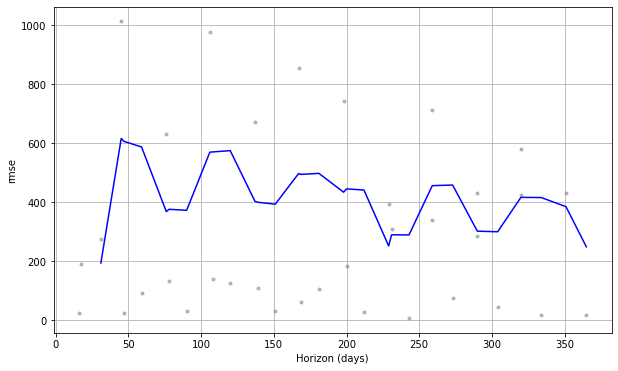

In [22]:
#Verificando a distribuição dos valores do RMSE pelo horizonte de dias:

from fbprophet.plot import plot_cross_validation_metric

fig = plot_cross_validation_metric(df_cv, metric='rmse')

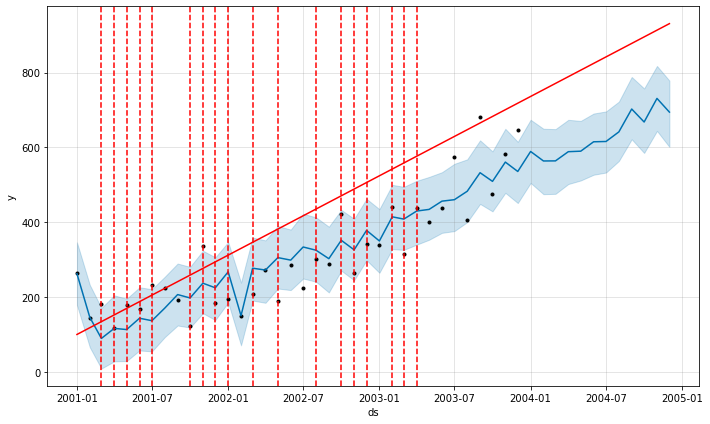

In [23]:
#Verificando a quantidade de changepoints graficamente:

from fbprophet.plot import add_changepoints_to_plot

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)


In [24]:
#separando os melhores parâmetros, selecionando o rmses mais baixos:

best_params = all_params[np.argmin(rmses)]
best_params


{'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.01}

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
100%|██████████| 3/3 [00:05<00:00,  2.00s/it]


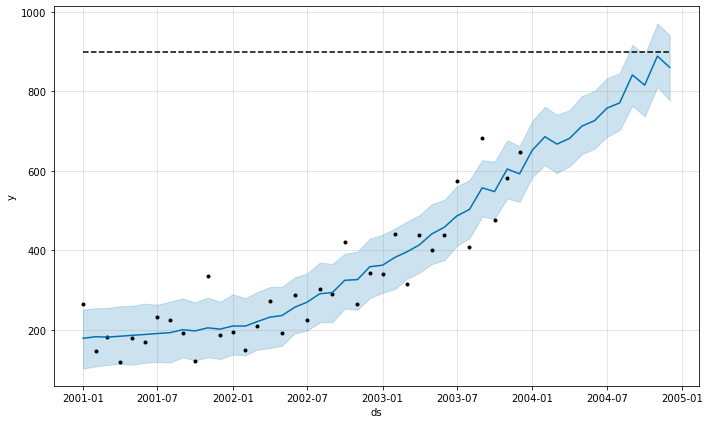

In [25]:
#Fazendo a predição usando o modelo com os melhores parâmetros encontrados no gridsearch

cutoffs = pd.to_datetime(['2002-01-1', '2002-06-15', '2003-01-15'])




model = Prophet(**best_params, 
        seasonality_mode = "multiplicative", 
        growth = 'linear',
        yearly_seasonality= False,
        )
        
df['cap'] = 900
df['floor'] = 100

model.add_seasonality(name='monthly', period=30.5, fourier_order=20)
model.fit(df)
df_cv = cross_validation(m, cutoffs=cutoffs,initial= '730', period = '180', horizon = "365 days")
future = model.make_future_dataframe(periods=12, freq ="MS") #Predição 1 ano a frente
future['cap'] = 900
future['floor'] = 100


forecast = model.predict(future)
fig1 = model.plot(forecast)

O gráfico acima contém nossos dados originais em conjunto com a predição do prophet. <br>
Podemos ver que ele obedece bem a tendência e trás uma predição suscinta de crescimento nas vendas.
<br>
A escolha de um teto em 900 é arbitrária para conseguirmos imaginar até onde nossa predição pode chegar.
<br><br>
Uma ressalva é necessária:<br><br>
A escolha de fazer um previsão com "growth = 'linear'" faz ele obedecer a tendência de crescimento linear muito rigidamente. Uma outra opção seria utilizar um crescimento logístico, que suavizaria o topo da predição chegando somente até o nosso teto. <br>
Explico-me, de maneira geral crescimentos exponenciais e lineares não são sustentáveis indefinidamente, em alguns casos vemos a queda dos dados logo na sequência (como no crescimento e diminuição de populações). Como nossos dados estão numa tendência de crescimento, optei pela linearidade pois a previsão foi feita apenas para 1 ano. Mas escolher um crescimento logístico em que próximo do teto encontraríamos uma regularidade ou constância das vendas também é uma predição saudável.

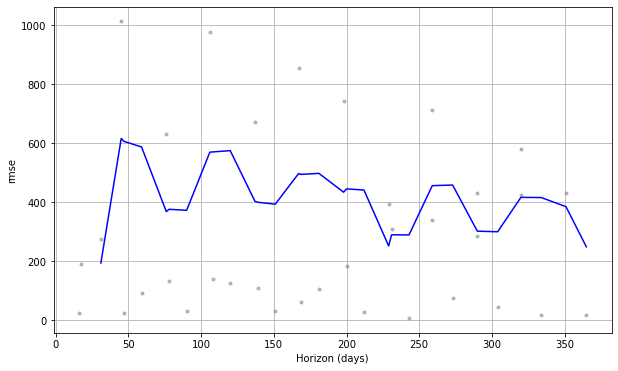

In [26]:
#Visualizando a as métricas do cross validation:


from fbprophet.plot import plot_cross_validation_metric

fig = plot_cross_validation_metric(df_cv, metric='rmse')

## Considerações finais

Nossa predição final utilizando o prophet parece estar bem ajustada e fiel.<br><br>

Os tratamentos feitos nos dados durante o notebook se deram por algumas necessidades, mas vale atentar que alguns pontos nos gráficos poderiam ser considerados outliers sob algumas perspectivas e eu optei por não excluí-los. Em outros modelos onde a presença de outliers (por menor que sejam) podem ser muito danosas, optei por mantê-los na análise desta série temporal porque a quantidade de dados era pouca, e o certo não seria excluí-los, mas classificá-los como "holidays", assim eles seriam modelados mas deixados de fora da previsão. 

### Obrigado pela atenção : )